---------------------------
## Segmentação de Imagens de Câncer de Mama

Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

Este dataset possui 322 imagens de mamografias.

A **Segmentação de Imagem** envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [11]:
# Para processar arquivos e imagens
from PIL import Image
import glob
import numpy as np

# Para plotar imagens
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from sklearn.cluster import KMeans # Agrupamento 

In [12]:
# Carregando as imagens

img_G = mpimg.imread('mdb001.pgm') # Tipo G
img_D = mpimg.imread('mdb003.pgm') # Tipo D
img_F = mpimg.imread('mdb005.pgm') # Tipo F

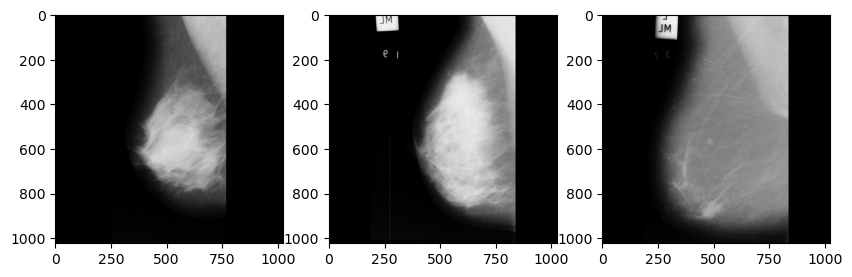

In [13]:
# Plotando as imagens

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [14]:
img_G.shape

(1024, 1024)

In [15]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1,1))
    kmeans = KMeans(n_clusters=clusters, random_state = 0, n_init=5)
    kmeans.fit(vectorized)
    
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    
    segmented_image = segmented_data.reshape((img.shape))
    return(segmented_image)


In [16]:
clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters) # Tipo G
img_D_segmentada = filtro_kmeans(img_D, clusters) # Tipo D
img_F_segmentada = filtro_kmeans(img_F, clusters) # Tipo F

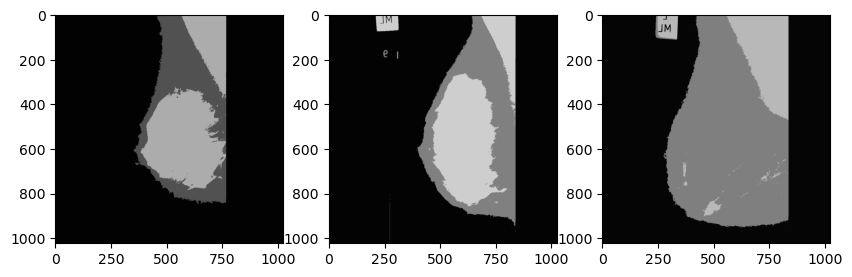

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()

Para mais informações de aplicação de técnicas de Agrupamento na segmentação de imagens, https://experiencor.github.io/segmentation.html